In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


file_path =("C:/Users/lenovo/Desktop/Essentials!/Data Science Salaries Dataset/Latest_Data_Science_Salaries.csv")

In [53]:
data = pd.read_csv("C:/Users/lenovo/Desktop/Essentials!/Data Science Salaries Dataset/Latest_Data_Science_Salaries.csv")
data.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


In [54]:
df.tail()

,job_title,job_category
0,Data Engineer,Data Engineering
1,Data Scientist,Data Science
2,Machine Learning Engineer,Machine Learning
3,Data Analyst,Data Engineering


In [60]:
df.columns

Index(['job_title', 'job_category'], dtype='object')

In [61]:
df.sort_values

<bound method DataFrame.sort_values of                    job_title      job_category
0              Data Engineer  Data Engineering
1             Data Scientist      Data Science
2  Machine Learning Engineer  Machine Learning
3               Data Analyst  Data Engineering>

In [62]:
# Import country code libraries
!pip install pycountry -q
import pycountry

#Install plot library
import plotly.io as pio
pio.renderers.default='notebook'

In [63]:
data.isnull().sum()

Job Title             0
Employment Type       0
Experience Level      0
Expertise Level       0
Salary                0
Salary Currency       0
Company Location      0
Salary in USD         0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64

In [64]:
data.nunique()

Job Title              111
Employment Type          4
Experience Level         4
Expertise Level          4
Salary                1071
Salary Currency         22
Company Location        71
Salary in USD         1315
Employee Residence      83
Company Size             3
Year                     4
dtype: int64

In [65]:
data.shape

(3300, 11)

In [66]:
data['Experience Level'] = data['Experience Level'].replace({
    'SE': 'Senior',
    'EN': 'Entry',
    'EX': 'Executive',
    'MI': 'Mid',
})

data['Employment Type'] = data['Employment Type'].replace({
    'FL': 'Freelance',
    'CT': 'Contract',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
data['Company Size'] = data['Company Size'].replace({
    'S': 'Small',
    'M': 'Medium',
    'L' : 'Large',
})

In [67]:
print('There are',data['Job Title'].nunique(),'different type of jobs available')
print(80*'*')
print('This are the jobs',data['Job Title'].unique())

There are 111 different type of jobs available
********************************************************************************
This are the jobs ['Data Engineer' 'Data Scientist' 'Analytics Engineer'
 'Business Intelligence Developer' 'Machine Learning Engineer'
 'Data Analyst' 'Decision Scientist' 'Machine Learning Software Engineer'
 'BI Developer' 'Machine Learning Scientist' 'BI Analyst' 'Data Manager'
 'Business Intelligence Engineer' 'ML Engineer' 'Data Science Manager'
 'AI Programmer' 'Applied Scientist' 'Data Analytics Manager'
 'Research Engineer' 'Research Scientist' 'Data Lead' 'Data Strategist'
 'Data Quality Analyst' 'Data Architect' 'AI Architect'
 'Computer Vision Engineer' 'Business Intelligence Analyst'
 'Principal Data Scientist' 'Staff Machine Learning Engineer'
 'Staff Data Scientist' 'Consultant Data Engineer'
 'Machine Learning Specialist' 'Head of Data' 'Data Quality Engineer'
 'Research Analyst' 'Principal Machine Learning Engineer'
 'Deep Learning Engineer' '

In [68]:
job_df = pd.DataFrame(data['Job Title'].value_counts().reset_index())
job_df.rename(columns = {'index':'Role','Job Title':'frequency'}, inplace = True)
job_df

,Role,frequency
0,Data Engineer,702
1,Data Scientist,635
2,Data Analyst,459
3,Machine Learning Engineer,300
4,Analytics Engineer,132
...,...,...
106,Deep Learning Researcher,1
107,Analytics Engineering Manager,1
108,AWS Data Architect,1
109,BI Data Engineer,1


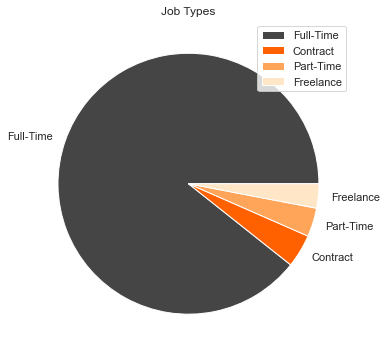

In [77]:
# Plot the pie chart using seaborn
plt.figure(figsize=(6, 6))  # Set the size of the chart
sns.set(style='whitegrid')  # Set the style of the chart

# Plot the pie chart
plt.pie(j_type_data['Count'], labels=j_type_data['Job Type'],colors=colors)

# Add a title to the chart
plt.title('Job Types')
plt.legend()

# Display the chart
plt.show()

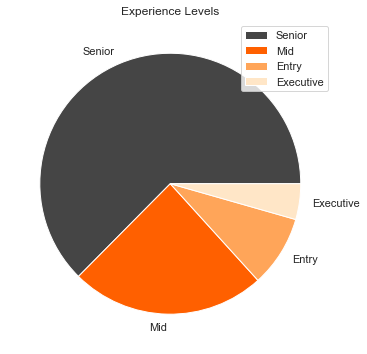

In [46]:
data = {
    'Experience Level': ['Senior', 'Mid', 'Entry', 'Executive'],
    'Count': [2065, 797, 292, 146]
}
df_experience_level = pd.DataFrame(data)

# Specify custom colors
colors = ['#454545', '#FF6000', '#FFA559', '#FFE6C7']

# Plot the pie chart using seaborn
plt.figure(figsize=(6, 6))  # Set the size of the chart
sns.set(style='whitegrid')  # Set the style of the chart

# Plot the pie chart with custom colors
wedges, texts = plt.pie(df_experience_level['Count'], labels=df_experience_level['Experience Level'], colors=colors)

# Add a title to the chart
plt.title('Experience Levels')
plt.legend()

# Display the chart
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19220\682639143.py:6: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



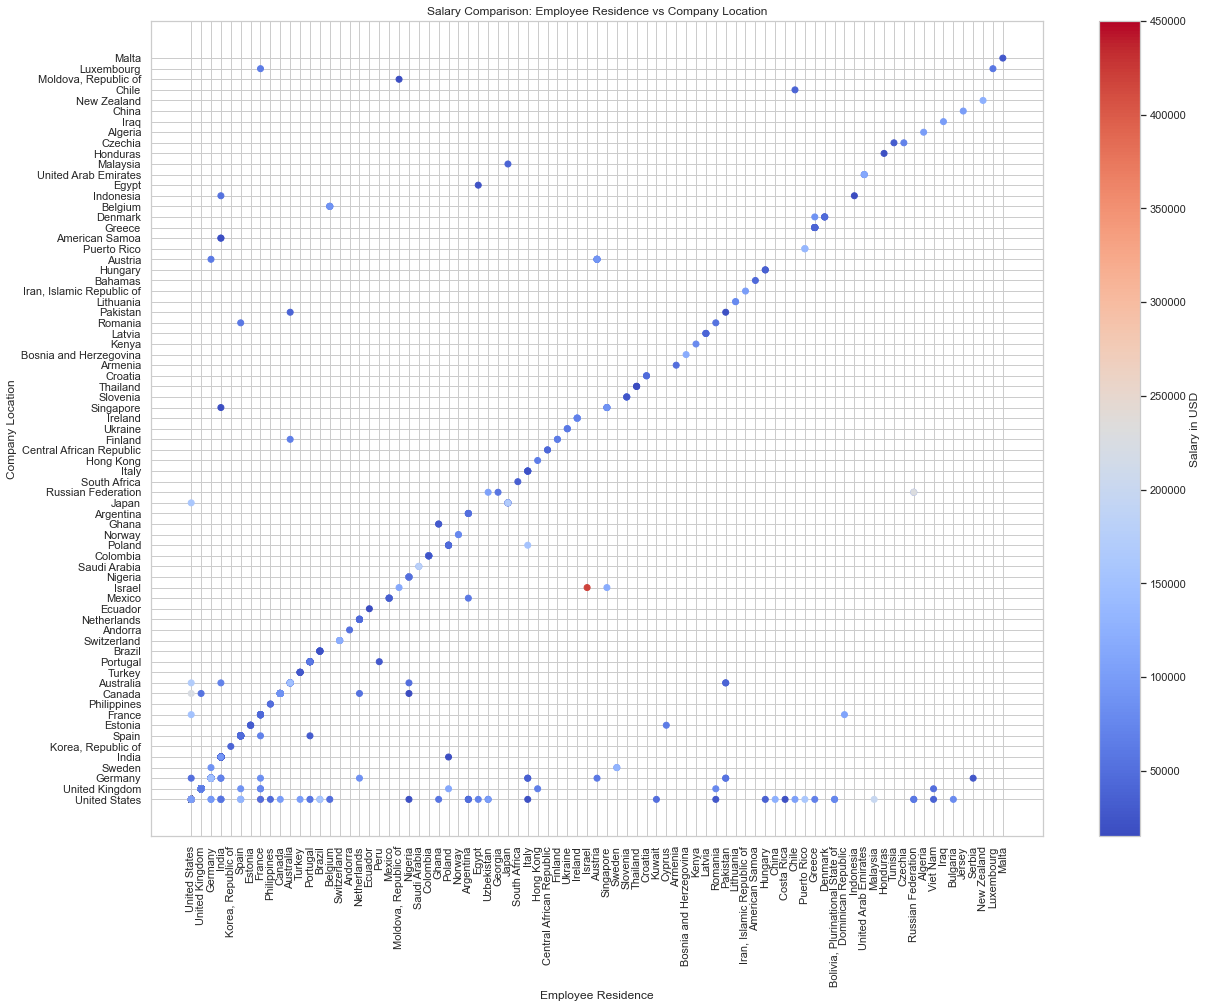

In [69]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(20, 15))
plt.scatter(data['Employee Residence'], data['Company Location'], c=data['Salary in USD'], cmap='coolwarm')
plt.colorbar(label='Salary in USD')
plt.xlabel('Employee Residence')
plt.ylabel('Company Location')
plt.title('Salary Comparison: Employee Residence vs Company Location')
plt.xticks(rotation=90)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


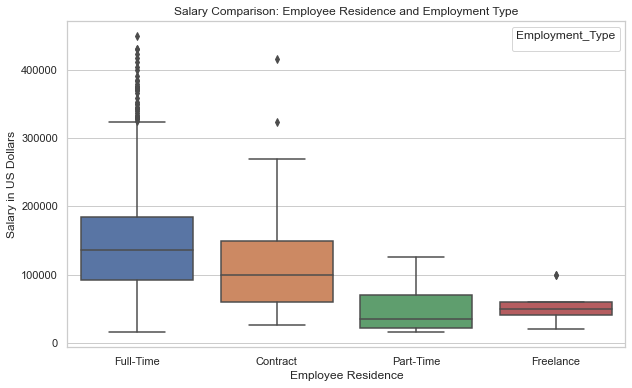

In [70]:
import seaborn as sns
# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Employment Type', y='Salary in USD')
plt.xlabel('Employee Residence')
plt.ylabel('Salary in US Dollars')
plt.title('Salary Comparison: Employee Residence and Employment Type')
plt.legend(title='Employment_Type')
plt.show()

NameError: name 'stats' is not defined

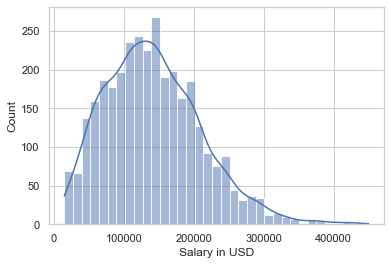

In [71]:
import seaborn as sns
# Create a list of the columns to analyze
columns = ['Salary in USD']

# Loop over the columns and plot the distribution of each variable
for col in columns:
    # Plot the distribution of the data
    sns.histplot(data[col], kde=True)

    # Fit a normal distribution to the data
    (mu, sigma) = stats.norm.fit(data[col])
    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(col, mu, sigma))

    # Calculate the skewness and kurtosis of the data
    print('{}: Skewness: {:.2f}'.format(col, data[col].skew()))
    print('{}: Kurtosis: {:.2f}'.format(col, data[col].kurt()))

    # Add the fitted normal distribution to the plot
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')
    
     # Add labels and title to the plot
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.title('Distribution of {}'.format(col),fontsize=20)

    plt.show()

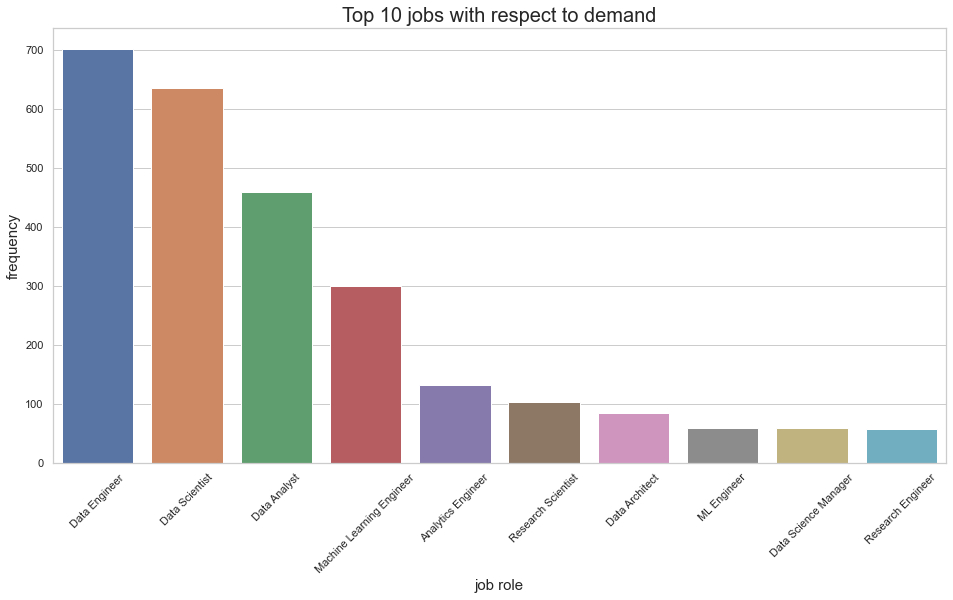

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
plt.title("Top 10 jobs with respect to demand",fontsize=20)
sns.barplot(x=job_df["Role"][:10],y=job_df['frequency'][:10])
plt.ylabel("frequency",fontsize=15)
plt.xlabel("job role",fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [73]:
import pandas as pd

# Create a DataFrame 'df' with a 'job_title' column
data = {'job_title': ['Data Engineer', 'Data Scientist', 'Machine Learning Engineer', 'Data Analyst']}
df = pd.DataFrame(data)

# Define the function 'assign_broader_category'
def assign_broader_category(job_title):
    # Categories mapping
    data_engineering = ["Data Engineer", "Data Analyst"]
    data_scientist = ["Data Scientist"]
    machine_learning = ["Machine Learning Engineer"]
    
    # Assign broader categories
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    else:
        return "Other"

# Apply the function to the 'job_title' column and create a new column 'job_category'
df['job_category'] = df['job_title'].apply(assign_broader_category)

# Display the updated DataFrame
print(df)

                   job_title      job_category
0              Data Engineer  Data Engineering
1             Data Scientist      Data Science
2  Machine Learning Engineer  Machine Learning
3               Data Analyst  Data Engineering


In [74]:
job_category_df = pd.DataFrame(df['job_category'].value_counts().reset_index())
job_category_df.rename(columns = {'index':'category','job_category':'frequency'}, inplace = True)

In [75]:
job_category_df

,category,frequency
0,Data Engineering,2
1,Data Science,1
2,Machine Learning,1


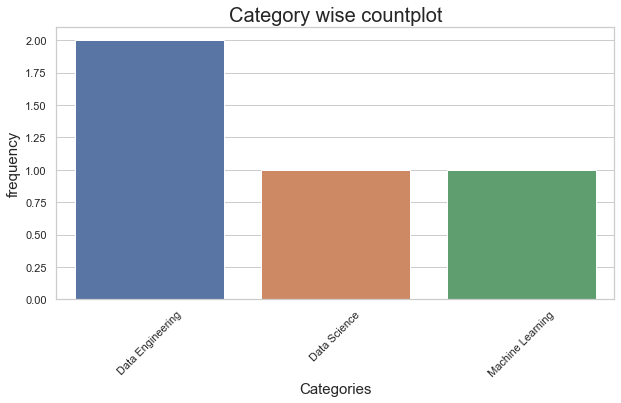

In [76]:
plt.figure(figsize=(10,5))
plt.title("Category wise countplot",fontsize=20)
sns.barplot(x=job_category_df["category"],y=job_category_df['frequency'])
plt.ylabel("frequency",fontsize=15)
plt.xlabel("Categories",fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [98]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set_style("dark")

In [99]:
df = pd.read_csv("C:/Users/lenovo/Desktop/Essentials!/Data Science Salaries Dataset/Latest_Data_Science_Salaries.csv")

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3300 non-null   object
 1   Employment Type     3300 non-null   object
 2   Experience Level    3300 non-null   object
 3   Expertise Level     3300 non-null   object
 4   Salary              3300 non-null   int64 
 5   Salary Currency     3300 non-null   object
 6   Company Location    3300 non-null   object
 7   Salary in USD       3300 non-null   int64 
 8   Employee Residence  3300 non-null   object
 9   Company Size        3300 non-null   object
 10  Year                3300 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 283.7+ KB


count    3.300000e+03
mean     2.046623e+05
std      7.279383e+05
min      1.400000e+04
25%      9.416900e+04
50%      1.400000e+05
75%      1.900000e+05
max      3.040000e+07
Name: Salary, dtype: float64


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



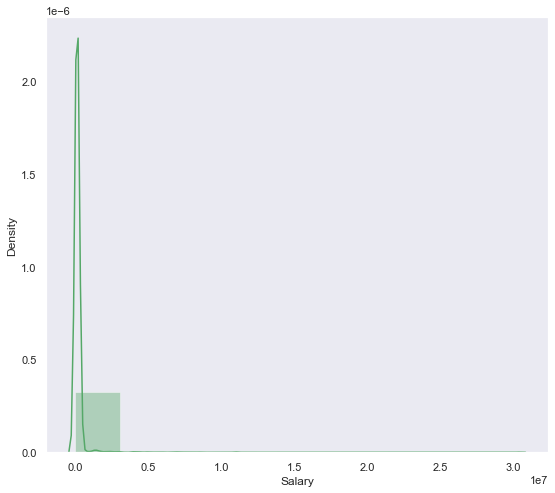

In [101]:
print(df['Salary'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Salary'], color='g', bins=10, hist_kws={'alpha': 0.4});

In [102]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64')]

In [103]:
import numpy as np

In [104]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Salary,Salary in USD,Year
0,210000,210000,2023
1,165000,165000,2023
2,185900,185900,2023
3,129300,129300,2023
4,140000,140000,2023


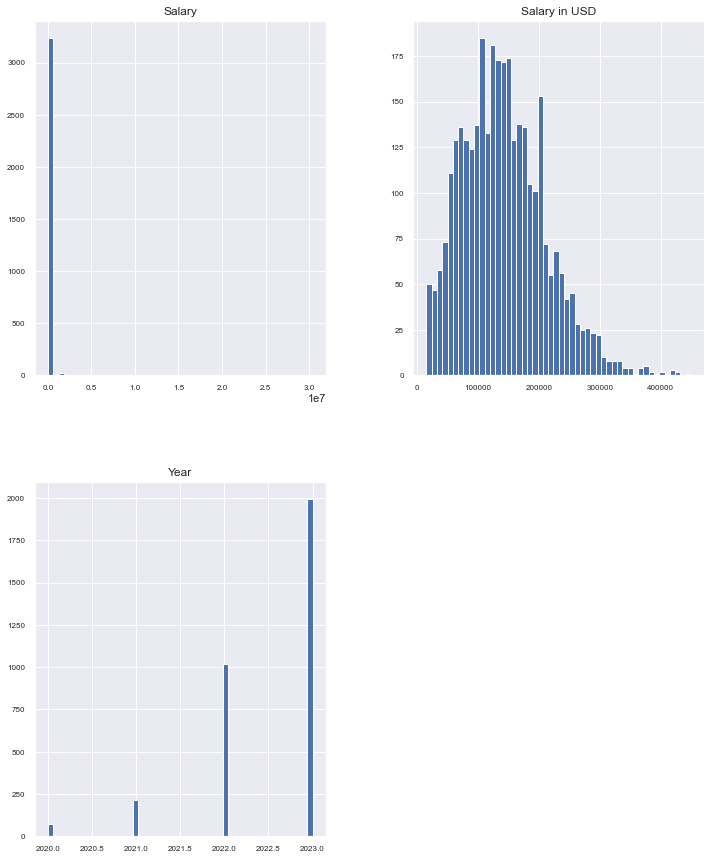

In [105]:
df_num.hist(figsize=(12, 15), bins=50, xlabelsize=8, ylabelsize=8);

<AxesSubplot:>

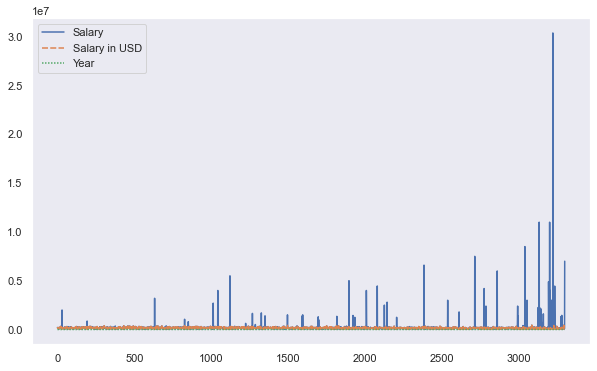

In [106]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df)

<AxesSubplot:xlabel='Salary', ylabel='Job Title'>

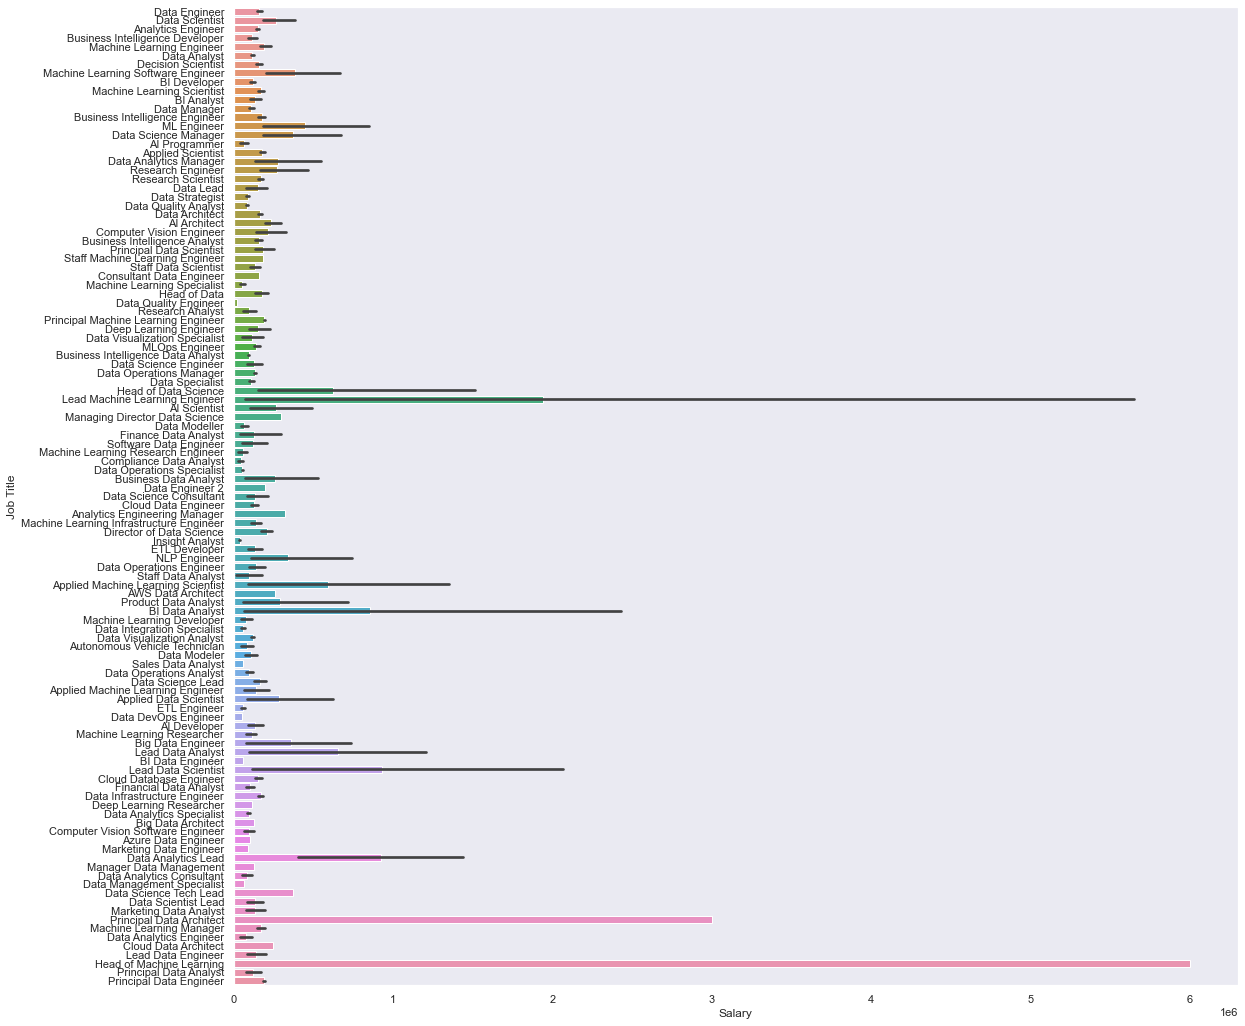

In [107]:
plt.figure(figsize=(18,18))
sns.barplot(x=df['Salary'], y=df['Job Title'])

<AxesSubplot:xlabel='Salary', ylabel='Year'>

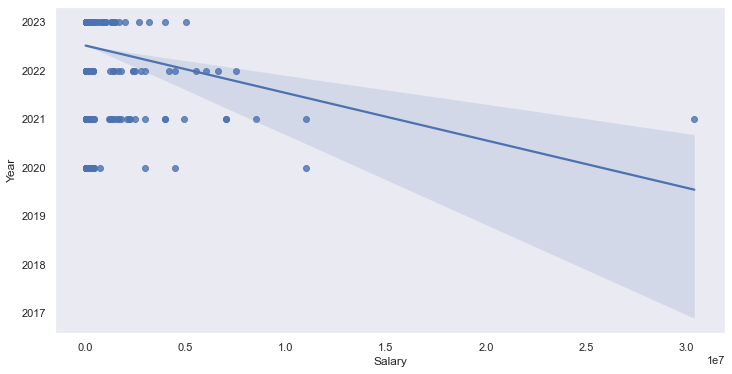

In [108]:
plt.figure(figsize=(12,6))
sns.regplot(x=df['Salary'], y=df['Year'])

<Figure size 1080x1080 with 0 Axes>

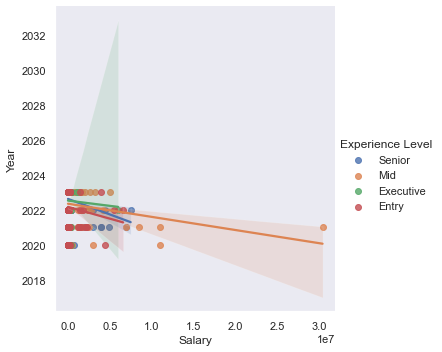

In [109]:
plt.figure(figsize=(15,15))
sns.lmplot(x="Salary", y="Year", hue="Experience Level", data=df)

In [110]:
df_num_corr = df_num.corr()['Salary'][:-1] # -1 because the latest row is Sepal length
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Salary:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Salary:
Salary    1.0
Name: Salary, dtype: float64


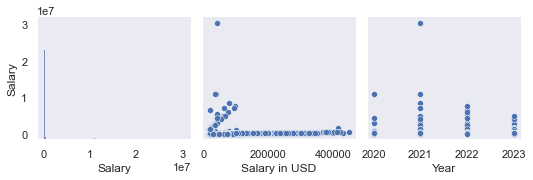

In [111]:
for i in range(0, len(df_num.columns), 3):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+3],
                y_vars=['Salary'])

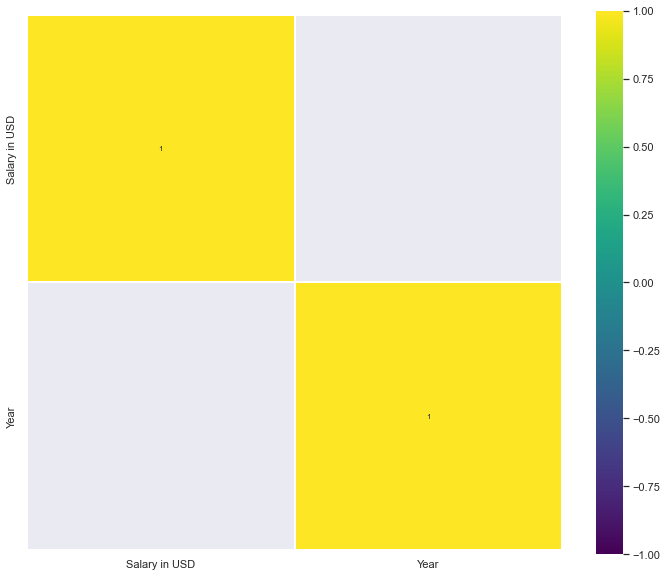

In [112]:
corr = df_num.drop('Salary', axis=1).corr() # We already examined sepal length correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

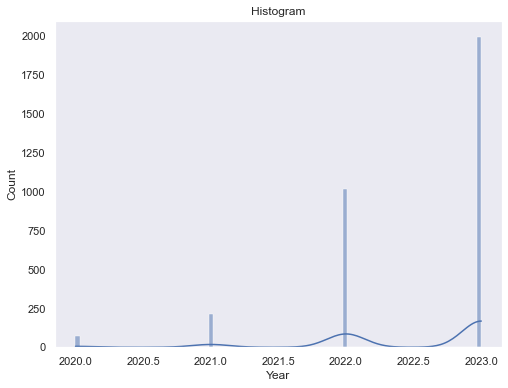

In [113]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='Year', bins=100, kde=True)
plt.title("Histogram")
plt.show()

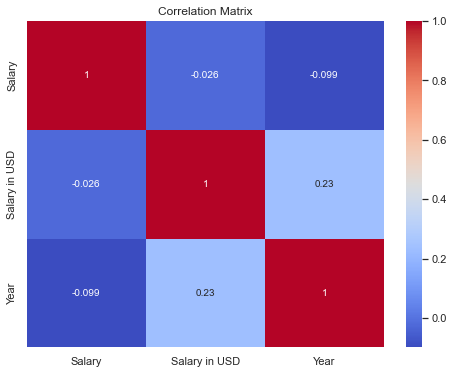

In [114]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [116]:
quantitative_features_list = ['Salary', 'Salary in USD', 'Year']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,Salary,Salary in USD,Year
0,210000,210000,2023
1,165000,165000,2023
2,185900,185900,2023
3,129300,129300,2023
4,140000,140000,2023


In [117]:
categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary Currency,Company Location,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,United States Dollar,United States,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,United States Dollar,United States,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,United States Dollar,United States,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,United States Dollar,United States,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,United States Dollar,United States,United States,Medium,2023


In [118]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 8 non numerical features including:
['Job Title', 'Employment Type', 'Experience Level', 'Expertise Level', 'Salary Currency', 'Company Location', 'Employee Residence', 'Company Size']


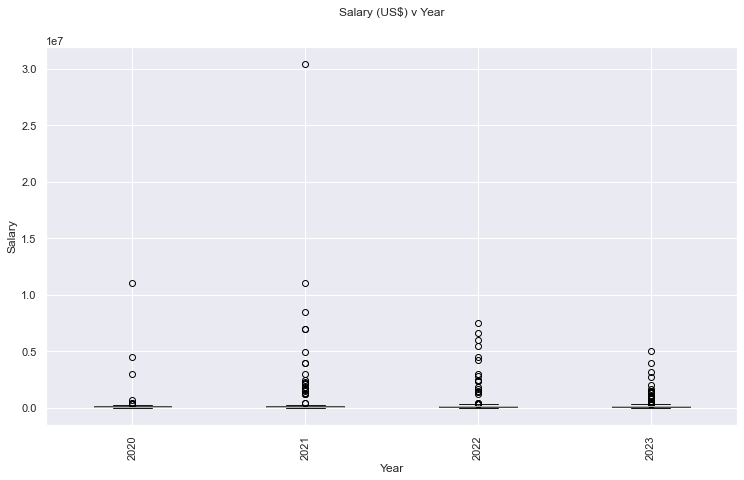

In [120]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Year', ax=ax)
plt.suptitle('Salary (US$) v Year')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()